# RoadSafety Vehicles 2014

TODO
* split age by sex
* if we bin age and plot by sex and CC can we do a factorplot?
* plot CC vs age as normed cumulative plot (at the end, needs both plots joined via subplots)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ctrl B for the inline tmp-run box

In [2]:
df=pd.read_csv("data/DfTRoadSafety_Vehicles_2014.csv")
print("Read {} rows".format(df.shape))
#df = df[:100]
df['freq'] = 1
df.head()

Read (268527, 22) rows


,﻿Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,freq
0,201401BS70001,1,8,0,18,0,0,0,0,0,...,1,1,49,8,1997,2,2,4,1,1
1,201401BS70001,2,19,0,15,0,0,0,0,0,...,6,1,-1,-1,4249,2,2,-1,-1,1
2,201401BS70002,1,9,0,2,0,1,0,0,0,...,6,1,-1,-1,6750,1,12,-1,-1,1
3,201401BS70002,2,1,0,14,0,1,0,4,0,...,6,2,27,6,-1,-1,-1,-1,-1,1
4,201401BS70003,1,9,0,9,0,5,0,0,0,...,6,1,49,8,1598,1,4,1,1,1


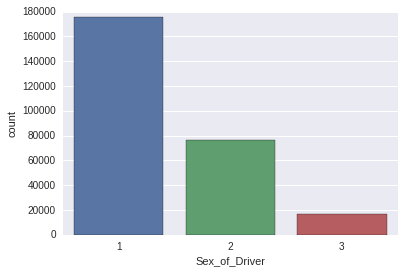

In [3]:
sns.countplot(data=df, x="Sex_of_Driver")
# 1==man, 2==woman, 3==unknown

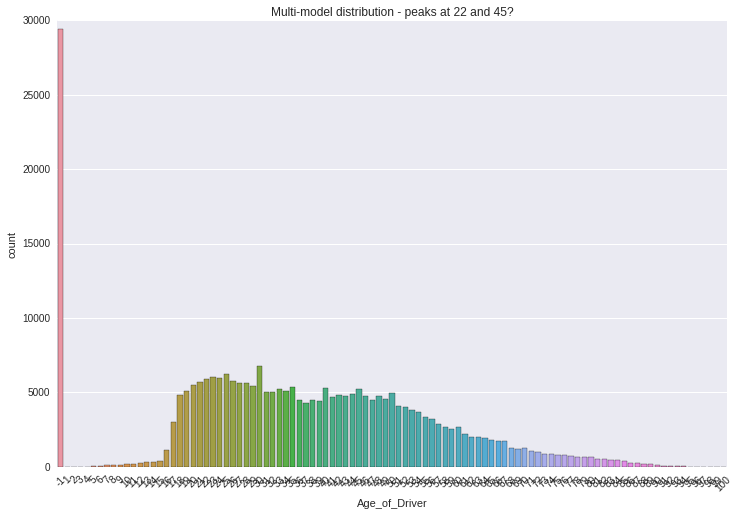

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
min_age = df.query("Age_of_Driver>-1").Age_of_Driver.min()
max_age = df.Age_of_Driver.max()
ages_seen = [-1] + list(range(min_age, max_age+1))
sns.countplot(data=df, x="Age_of_Driver", ax=ax, order=ages_seen)
locs, labels = plt.xticks()
_=plt.setp(labels, rotation=45)
plt.title("Multi-model distribution - peaks at 22 and 45?")

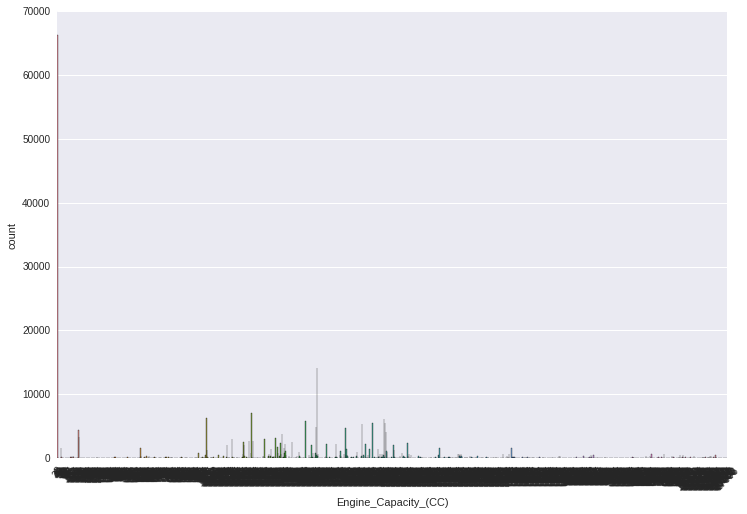

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(data=df, x="Engine_Capacity_(CC)", ax=ax)#, kwargs={"rot":30})
locs, labels = plt.xticks()
_=plt.setp(labels, rotation=45)

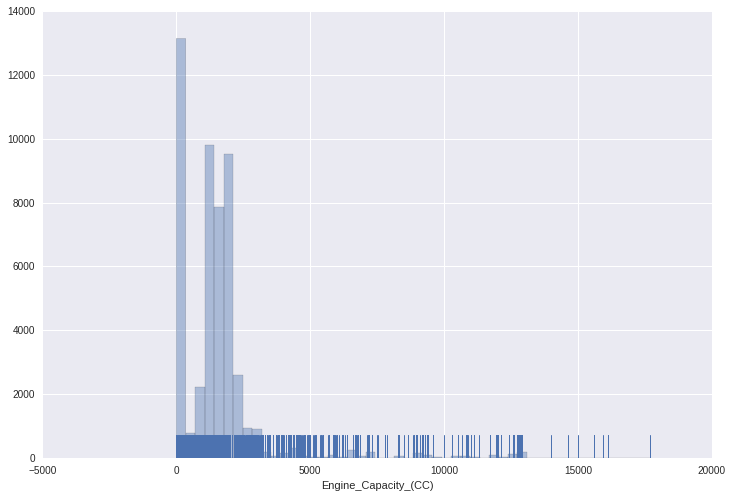

In [6]:
df_cc_sexknown = df.query("Sex_of_Driver < 3")
# subsample a reasonable set of people for where the sex is known
df_cc = df_cc_sexknown[['Engine_Capacity_(CC)', 'Sex_of_Driver']].sample(50000)

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df_cc['Engine_Capacity_(CC)'], kde=False, rug=True, ax=ax);

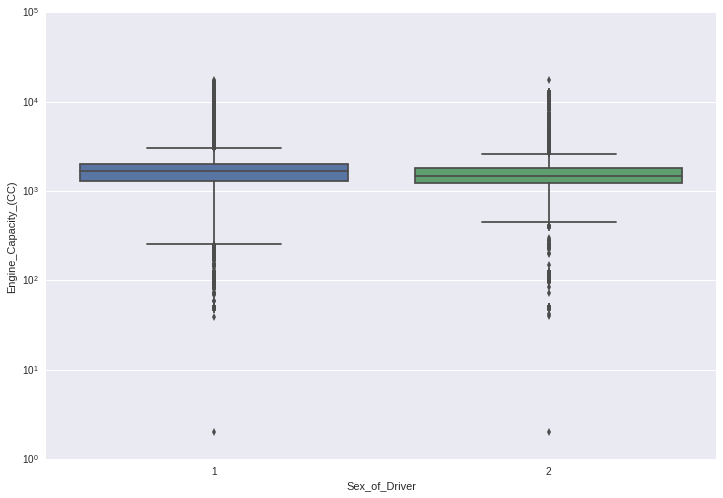

In [7]:
mask = df_cc_sexknown['Engine_Capacity_(CC)'] > 0
df_cc_above0 = df_cc_sexknown[mask]

fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df_cc_above0, x="Sex_of_Driver", y="Engine_Capacity_(CC)", ax=ax)
ax.set_yscale('log')

In [8]:
# Perform a Mann-White U Rank Sums tests to see if our distributions
# of Engine Capacity are the same between men and women
from scipy.stats import ranksums
engine_capacity_men = df_cc_above0.query("Sex_of_Driver==1")['Engine_Capacity_(CC)'].values
engine_capacity_women = df_cc_above0.query("Sex_of_Driver==2")['Engine_Capacity_(CC)'].values
# NH: Women and Men have the same distribution of engine CCs 
# AH: Women and Men have different distributions of engine CCs
pvalue = ranksums(engine_capacity_men, engine_capacity_women).pvalue
print("Reject NH of same distributions?", pvalue < 0.05)

Reject NH of same distributions? True


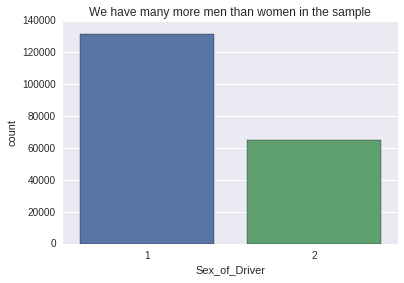

In [9]:
sns.countplot(data=df_cc_above0, x="Sex_of_Driver")
_=plt.title("We have many more men than women in the sample")

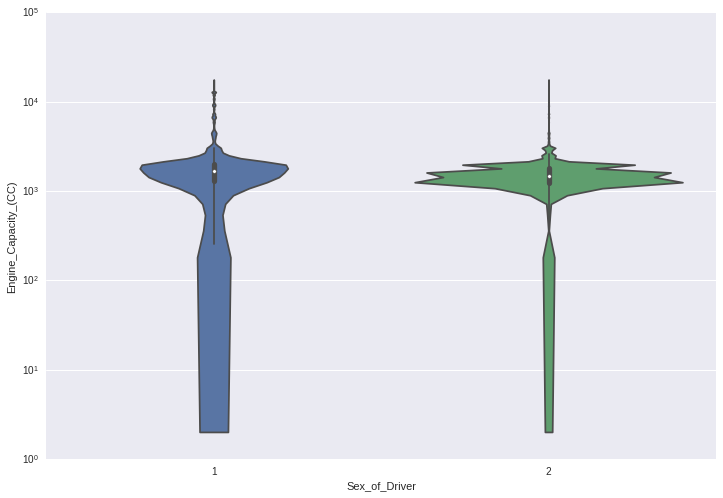

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(data=df_cc_above0, x="Sex_of_Driver", y="Engine_Capacity_(CC)", cut=0, ax=ax)
ax.set_yscale('log')

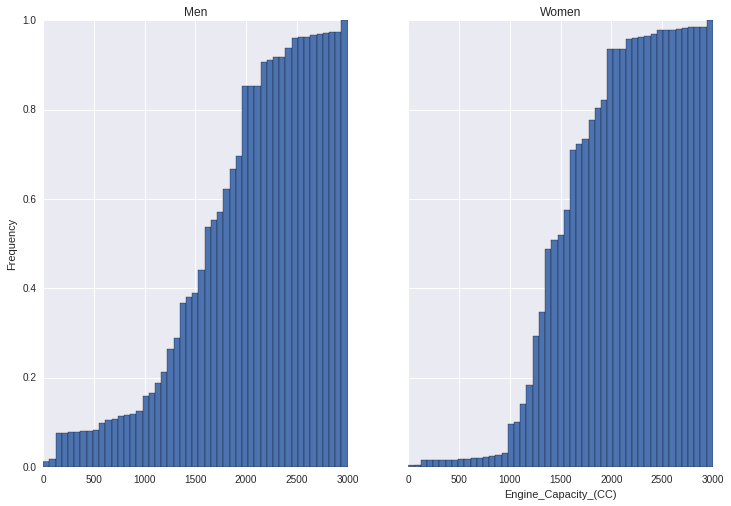

In [11]:
import numpy as np
FIGSIZE=(12,8)
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=FIGSIZE)
mask = df['Engine_Capacity_(CC)'] > 0
df_to_plot = df[mask].query("Sex_of_Driver==1")
bins = np.linspace(0, 3000, 50)
df_to_plot['Engine_Capacity_(CC)'].plot(kind="hist", bins=bins, cumulative=True, normed=True, ax=axs[0], title="Men")
df_to_plot = df[mask].query("Sex_of_Driver==2")
df_to_plot['Engine_Capacity_(CC)'].plot(kind="hist", bins=bins, cumulative=True, normed=True, ax=axs[1], title="Women")
plt.xlabel("Engine_Capacity_(CC)")
_=plt.ylim(ymax=1.0)
# Why do we see <1000CC cars (especially for men)?
# Do women driver <2000CC cars more so than men?
# Trucks are >15kcc and more likely to be driven by men?